## Get Familiar with ML Basics in a Kaggle Competition: Titanic

<img src="images/titanic.jpeg" width="800" style="float:left"/>

## 📌 Task 1: Getting Started with Kaggle
    Creating your account and joining the competition
---
- Create your kaggle account and join the [**Titanic: Machine Learning from Disaster**](https://www.kaggle.com/c/titanic).
- Read the description and most important informations about the competition. 
- Download the entire dataset on the platform.
Now let's start our project! Let's dive in! 

## 📌 Task 2: Exploratory Data Analysis (EDA)
    Start working on your dataset. Import necessary libraries and and make an exploratory data analysis using pandas profilling and seaborn.


### Importing Libraries
---
Import the most important libraries you will be using initially.

In [27]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv) 
import matplotlib.pyplot as plt #plot our graphics and visualize our data
import seaborn as sns #plot beatiful graphics :)
import pandas_profiling as pp #pandas profilling analyse our entire dataset and facilate our work in a EDA
import missingno #missing values plot
import warnings
warnings.filterwarnings('ignore')
# %matplotlib inline
# %pip install pandas-profiling

### Import the dataset
---

In [28]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

In [29]:
train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [30]:
test_data.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [31]:
print('Number of Training = {}'.format(train_data.shape[0]))
print('Number of Test = {}\n'.format(test_data.shape[0]))

#target columns
train_data.columns

Number of Training = 891
Number of Test = 418



Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Data visualization
---


In [32]:
# It saves us some precious time on the EDA process.
# You also have the option to plot the data separately, 
# using the matplolib and seaborn libraries.

report = pp.ProfileReport(train_data)
display(report)

**Export your report**

In [33]:
# The following command will export your previous report into a html file. 
report.to_file(output_file="dataframe_titanic_report.html")

**Variable Notes**

_pclass_: A proxy for socio-economic status (SES)
- _1st_ = Upper
- _2nd_ = Middle
- _3rd_ = Lower

_age_: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

_sibsp_: The dataset defines family relations in this way...
- _Sibling_ = brother, sister, stepbrother, stepsister
- _Spouse_ = husband, wife (mistresses and fiancés were ignored)

_parch_: The dataset defines family relations in this way...
- _Parent_ = mother, father
- _Child_ = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

## 📌 Task 3: Preprocessing I
    Taking care of Missing Values
---

**Important:** Missing data is information that is missing from a database and could be important for the result of an analysis. Working with a dataset with missing values is a problem of great relevance at the time of data analysis and can originate from different sources, such as failures in the collection system, problems with the integration of different sources, etc., the point is: we must be careful to avoid bias in the results we seek.

In [34]:
'''
Descriptive statistics include those that summarize the central tendency, 
dispersion and shape of a dataset’s distribution, excluding NaN values.
'''
train_data.describe(include="all")

PassengerId    Survived      Pclass                   Name   Sex  \
count    891.000000  891.000000  891.000000                    891   891   
unique          NaN         NaN         NaN                    891     2   
top             NaN         NaN         NaN  Mionoff, Mr. Stoytcho  male   
freq            NaN         NaN         NaN                      1   577   
mean     446.000000    0.383838    2.308642                    NaN   NaN   
std      257.353842    0.486592    0.836071                    NaN   NaN   
min        1.000000    0.000000    1.000000                    NaN   NaN   
25%      223.500000    0.000000    2.000000                    NaN   NaN   
50%      446.000000    0.000000    3.000000                    NaN   NaN   
75%      668.500000    1.000000    3.000000                    NaN   NaN   
max      891.000000    1.000000    3.000000                    NaN   NaN   

               Age       SibSp       Parch    Ticket        Fare Cabin  \
count   714.000000  891.000000  891.000000       891  891.000000   204   
unique         NaN         NaN         NaN       681         NaN   147   
top            NaN         NaN         NaN  CA. 2343         NaN    G6   
freq           NaN         NaN         NaN         7         NaN     4   
mean     29.699118    0.523008    0.381594       NaN   32.204208   NaN   
std      14.526497    1.102743    0.806057       NaN   49.693429   NaN   
min       0.420000    0.000000    0.000000       NaN    0.000000   NaN   
25%      20.125000    0.000000    0.000000       NaN    7.910400   NaN   
50%      28.000000    0.000000    0.000000       NaN   14.454200   NaN   
75%      38.000000    1.000000    0.000000       NaN   31.000000   NaN   
max      80.000000    8.000000    6.000000       NaN  512.329200   NaN   

       Embarked  
count       889  
unique        3  
top           S  
freq        644  
mean        NaN  
std         NaN  
min         NaN  
25%         NaN  
50%         NaN  
75%         NaN  
max         NaN

After visualized our entire dataset, **check the describe above or the Sample in our dataframe report**, you see that there are certain data points labeled with a `NaN`. These denote missing values. Diferent datasets encode missing values in different ways. Sometimes it may be a `9999`, other times a`0` - because real world data can be very messy!


**The goal here is to figure out how best to process the data so our machine learning model can learn from it.**

Ideally, all the features will be encoded into a numerical value of some kind. It’s important to understand why you need to transform categorical data. Some Machine Learning algorithms do not work with categorical data, that is, they do not accept this data as input. For example, algorithms like Support Vector Machine or a Linear Regression, only work with numerical values. In view of this limitation, we need to convert categorical variables to numerical values in this first instance. 


### Preprocessing
---




**Look at numeric and categorical values separately:**

Numerical Features: Age, Fare, SibSp, Parch.

Categorical Features: Survived, Sex, Embarked, Pclass.

Alphanumeric Features (but categorical): Ticket, Cabin.

In our overview report, click on the tab "Warnings": 

- Tickets and Cabin are features with a high cardinality, e some many distinc values. 
- Age and Cabin has a lot of missing values.
- Name and ID has unique values.
- SibSp, Parch and Fare has a lot of zeros. 

In [35]:
train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

**How many people survived?**

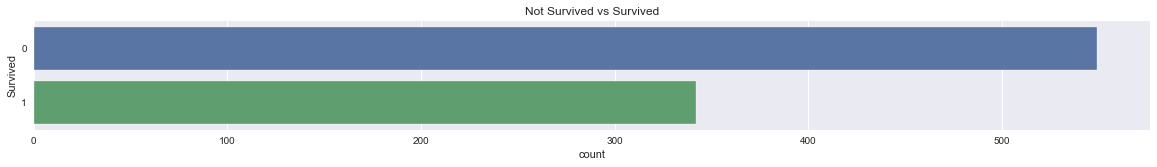

In [36]:
plt.figure(figsize=(20, 2))
sns.countplot(y ="Survived",data=train_data)
plt.title("Not Survived vs Survived")
plt.show()

--- 
**Feature Name**

In [37]:
#Feature: Name and ID. We won't move forward using the name variable.
train_data = train_data.drop(["Name"], axis=1)
test_data = test_data.drop(["Name"], axis=1)

---
**Feature Age**

<AxesSubplot:xlabel='Survived', ylabel='Age'>

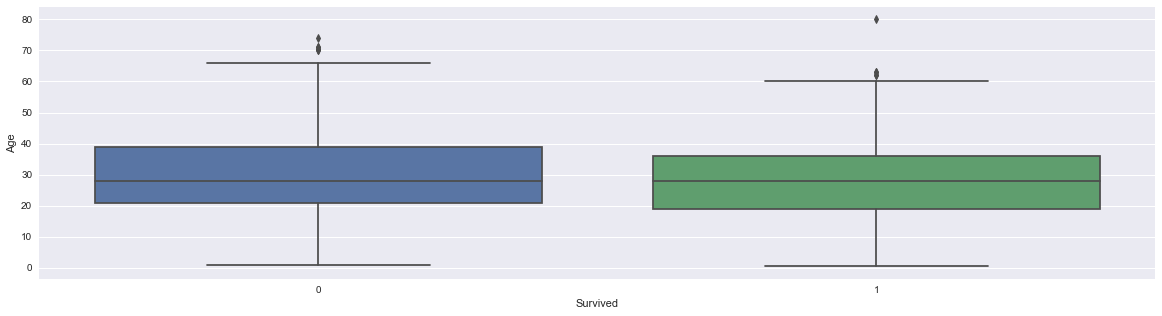

In [38]:
plt.figure(figsize=(20, 5))
sns.boxplot(x="Survived", y="Age", data=train_data)

In [39]:
#Feature: Age. We have some missing values in Age, 117 missing, we won't move forward with this.
train_data = train_data.drop(["Age"], axis = 1)
test_data = test_data.drop(["Age"], axis = 1)

---
**Feature Ticket**

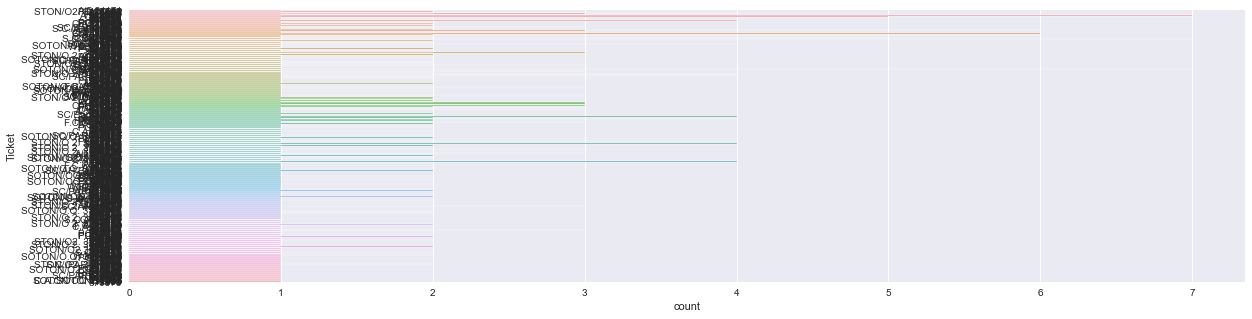

In [40]:
plt.figure(figsize=(20, 5))
sns.countplot(y="Ticket", data=train_data);

In [41]:
#Feature: Ticket. We won't use Ticket.
train_data = train_data.drop(["Ticket"], axis=1)
test_data = test_data.drop(["Ticket"], axis=1)

--- 
**Feature Cabin**

In [42]:
#Feature: Cabin. Too many missing values, we won't move forward with this.
train_data = train_data.drop(["Cabin"], axis=1)
test_data = test_data.drop(["Cabin"], axis=1)

---
**Feature Embarked**

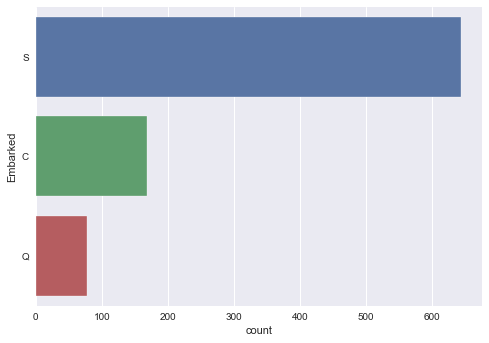

In [43]:
sns.countplot(y='Embarked', data=train_data);

In [44]:
#We have 2 missing values in the feature embarked. We will Drop these 2 missing values only in the train set
train_data = train_data.dropna(subset=["Embarked"])

'''
Other option, is fill the 2 missing values with the place where the majority of people embarked 
According our histogram plotted in our report, Southampton is the most frequent
replacing the missing values in the Embarked feature with S
'''
#train_data = train_data.fillna({"Embarked": "S"})

'\nOther option, is fill the 2 missing values with the place where the majority of people embarked \nAccording our histogram plotted in our report, Southampton is the most frequent\nreplacing the missing values in the Embarked feature with S\n'

---
**Feature Sex**

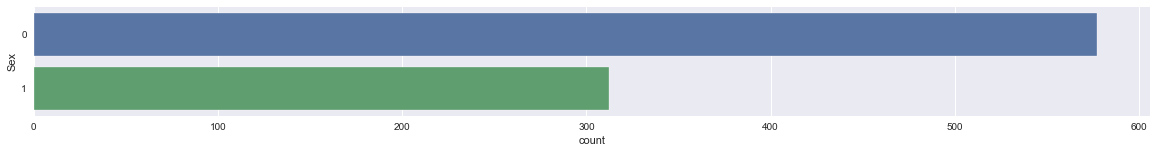

In [45]:
#Sex Feature: map each Sex value to a numerical value
#0 for male and 1 for female
train_data["Sex"] = np.where(train_data["Sex"] == "female", 1, 0)
test_data["Sex"] = np.where(test_data["Sex"] == "female", 1, 0)

# Let's view the distribution of Sex in our dataset
plt.figure(figsize=(20, 2))
sns.countplot(y="Sex", data=train_data);

In [46]:
train_data.head()

PassengerId  Survived  Pclass  Sex  SibSp  Parch     Fare Embarked
0            1         0       3    0      1      0   7.2500        S
1            2         1       1    1      1      0  71.2833        C
2            3         1       3    1      0      0   7.9250        S
3            4         1       1    1      1      0  53.1000        S
4            5         0       3    0      0      0   8.0500        S

## 📌 Task 4: Preprocessing II
    Encoding Categorical Data
---

### Feature Encoding

Documentation: [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

**Train Dataset**

In [47]:
# Encoding the categorical columns
embarked_oh = pd.get_dummies(train_data["Embarked"], prefix="embarked")
sex_oh = pd.get_dummies(train_data["Sex"], prefix="sex")
plcass_oh = pd.get_dummies(train_data["Pclass"], prefix="pclass")

# Combine the encoded columns
train_data = pd.concat([train_data, 
                    embarked_oh, 
                    sex_oh, 
                    plcass_oh], axis=1)

train_data.head()

PassengerId  Survived  Pclass  Sex  SibSp  Parch     Fare Embarked  \
0            1         0       3    0      1      0   7.2500        S   
1            2         1       1    1      1      0  71.2833        C   
2            3         1       3    1      0      0   7.9250        S   
3            4         1       1    1      1      0  53.1000        S   
4            5         0       3    0      0      0   8.0500        S   

   embarked_C  embarked_Q  embarked_S  sex_0  sex_1  pclass_1  pclass_2  \
0           0           0           1      1      0         0         0   
1           1           0           0      0      1         1         0   
2           0           0           1      0      1         0         0   
3           0           0           1      0      1         1         0   
4           0           0           1      1      0         0         0   

   pclass_3  
0         1  
1         0  
2         1  
3         0  
4         1

In [48]:
# Drop the original categorical columns (because now they've been encoded)
train_data = train_data.drop(["Pclass", "Sex", "Embarked"], axis=1)

train_data.head()

PassengerId  Survived  SibSp  Parch     Fare  embarked_C  embarked_Q  \
0            1         0      1      0   7.2500           0           0   
1            2         1      1      0  71.2833           1           0   
2            3         1      0      0   7.9250           0           0   
3            4         1      1      0  53.1000           0           0   
4            5         0      0      0   8.0500           0           0   

   embarked_S  sex_0  sex_1  pclass_1  pclass_2  pclass_3  
0           1      1      0         0         0         1  
1           0      0      1         1         0         0  
2           1      0      1         0         0         1  
3           1      0      1         1         0         0  
4           1      1      0         0         0         1

---
**Test Dataset**

In [49]:
# Encoding the categorical columns
test_embarked_oh = pd.get_dummies(test_data["Embarked"], prefix="embarked")
test_sex_oh = pd.get_dummies(test_data["Sex"], prefix="sex")
test_plcass_oh = pd.get_dummies(test_data["Pclass"], prefix="pclass")

# Combine the encoded columns
test_data = pd.concat([test_data, 
                    test_embarked_oh, 
                    test_sex_oh, 
                    test_plcass_oh], axis=1)

test_data.head()

PassengerId  Pclass  Sex  SibSp  Parch     Fare Embarked  embarked_C  \
0          892       3    0      0      0   7.8292        Q           0   
1          893       3    1      1      0   7.0000        S           0   
2          894       2    0      0      0   9.6875        Q           0   
3          895       3    0      0      0   8.6625        S           0   
4          896       3    1      1      1  12.2875        S           0   

   embarked_Q  embarked_S  sex_0  sex_1  pclass_1  pclass_2  pclass_3  
0           1           0      1      0         0         0         1  
1           0           1      0      1         0         0         1  
2           1           0      1      0         0         1         0  
3           0           1      1      0         0         0         1  
4           0           1      0      1         0         0         1

In [50]:
# Drop the original categorical columns (because now they've been one hot encoded)
test_data = test_data.drop(["Pclass", "Sex", "Embarked"], axis=1)

test_data.head()

PassengerId  SibSp  Parch     Fare  embarked_C  embarked_Q  embarked_S  \
0          892      0      0   7.8292           0           1           0   
1          893      1      0   7.0000           0           0           1   
2          894      0      0   9.6875           0           1           0   
3          895      0      0   8.6625           0           0           1   
4          896      1      1  12.2875           0           0           1   

   sex_0  sex_1  pclass_1  pclass_2  pclass_3  
0      1      0         0         0         1  
1      0      1         0         0         1  
2      1      0         0         1         0  
3      1      0         0         0         1  
4      0      1         0         0         1

## 📌 Task 5: Split the Train & Test datasets
---

Split the dataset into training and testing is very common, and you will do it on countless occasions. Even though in this current problem, we have our training and test csv separately, we will use this technique in our training dataset, so we can get used to it.

**train_test_split**: The first argument will be the `feature data`, the second the `target or labels`. The `test_size` keyword argument specifies what proportion of the original data is used for the test set. Lastly, the `random_state` kward sets a seed for the random number generator that splits the data into trains and test.

Splitting the Training Data we will use part of our training data (30% in this case) to test the accuracy of our different models.

In [51]:
from sklearn.model_selection import train_test_split

y = train_data["Survived"] #target
X = train_data.drop(["Survived", "PassengerId"], axis=1) #train predictors

#train_test_split(predictors, target, test_size = 0.22, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state= 21, stratify=y)

In [52]:
X.shape

(889, 11)

In [53]:
# our target is a unique vector with one coordinate
y.shape

(889,)

## 📌 Task 6: Building our Machine Learning Models I
---


**Logistic Regression**

Logistic regression measures the relationship between the categorical dependent variable _(feature)_ and one or more independent variables _(features)_ by estimating probabilities using a logistic function, which is the cumulative distribution function of logistic distribution. 

Reference: [Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression)

In [54]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
acc_logreg

82.4

**Decision Tree**

Decision tree learning is one of the predictive modelling approaches used in statistics, data mining and machine learning. It uses a decision tree (as a predictive model) to go from observations about an item (represented in the branches) to conclusions about the item's target value (represented in the leaves). Tree models where the target variable can take a discrete set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. Decision trees are among the most popular machine learning algorithms given their intelligibility and simplicity

Reference: [Wikipedia](https://en.wikipedia.org/wiki/Decision_tree_learning)

In [55]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_val)
acc_dt = round(accuracy_score(y_pred, y_val) * 100, 2)
acc_dt

79.03

### Aditional Models
---


If you want to test other models, and compare their performance with the two we already use. Below you find these models already declared. Feel free to also test them. Chance the cell type, `raw` for `code`, and run to see the results. 

## 📌 Task 7: Submit your project on Kaggle
---

Now, we finish our model evaluate, it's time to create a submission.csv file to upload to the Kaggle competition!

In [56]:
#Original test dataset
test_data.head()

PassengerId  SibSp  Parch     Fare  embarked_C  embarked_Q  embarked_S  \
0          892      0      0   7.8292           0           1           0   
1          893      1      0   7.0000           0           0           1   
2          894      0      0   9.6875           0           1           0   
3          895      0      0   8.6625           0           0           1   
4          896      1      1  12.2875           0           0           1   

   sex_0  sex_1  pclass_1  pclass_2  pclass_3  
0      1      0         0         0         1  
1      0      1         0         0         1  
2      1      0         0         1         0  
3      1      0         0         0         1  
4      0      1         0         0         1

Before we run our best model to predict in the test dataset, we need enconding the categorical features, as the same way that we alredy had done in the train dataset. 

In [57]:
test_data.shape

(418, 12)

In [58]:
pd.isnull(test_data).sum()

PassengerId    0
SibSp          0
Parch          0
Fare           1
embarked_C     0
embarked_Q     0
embarked_S     0
sex_0          0
sex_1          0
pclass_1       0
pclass_2       0
pclass_3       0
dtype: int64

In [59]:
test_data = test_data.fillna(0)
pd.isnull(test_data).sum()

PassengerId    0
SibSp          0
Parch          0
Fare           0
embarked_C     0
embarked_Q     0
embarked_S     0
sex_0          0
sex_1          0
pclass_1       0
pclass_2       0
pclass_3       0
dtype: int64

In [60]:
submission = pd.DataFrame()
#set the output as a dataframe and convert to csv file named submission.csv
submission["PassengerId"] = test_data["PassengerId"]
submission

PassengerId
0            892
1            893
2            894
3            895
4            896
..           ...
413         1305
414         1306
415         1307
416         1308
417         1309

[418 rows x 1 columns]

In [61]:
test_data = test_data.drop("PassengerId", axis=1)
test_data.head()

SibSp  Parch     Fare  embarked_C  embarked_Q  embarked_S  sex_0  sex_1  \
0      0      0   7.8292           0           1           0      1      0   
1      1      0   7.0000           0           0           1      0      1   
2      0      0   9.6875           0           1           0      1      0   
3      0      0   8.6625           0           0           1      1      0   
4      1      1  12.2875           0           0           1      0      1   

   pclass_1  pclass_2  pclass_3  
0         0         0         1  
1         0         0         1  
2         0         1         0  
3         0         0         1  
4         0         0         1

In [62]:
predictions = logreg.predict(test_data)
submission["Survived"] =  predictions
submission.to_csv("submission.csv", index=False)

### Tips and Resources: 

- Resources that may be insterested take a look: [Titanic - A Data Science Approach](https://www.kaggle.com/pedrodematos/titanic-a-complete-data-science-approach)

- This complete notebook, you will find in my github account, if you want make improvements, feel free to do that and share with me. 
[Project on Github](https://github.com/mirianfsilva/titanic-kaggle-competition)

- Keep praticing on Kaggle! 

- It's important that you improve your theorical backgroung too, undestanding what's every model does in the background. So I also recommend this Coursera Course, it's a good complement for your practices: [Machine Learning by Stanford University](https://www.coursera.org/learn/machine-learning)